# Import Libraries

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import plotly
print('plotly: {}'.format(plotly.__version__))
import plotly.express as px
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import klib
print('klib: {}'.format(klib.__version__))
from scipy.stats import zscore
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder 
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score ,mean_squared_error, mean_absolute_error, r2_score , f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb  
import pickle   # biblio qui sauvegarde le modèle # 
import joblib

Python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
scipy: 1.11.4
numpy: 1.26.4
matplotlib: 3.8.0
seaborn: 0.13.2
plotly: 5.13.0
pandas: 2.1.4
klib: 1.3.1
sklearn: 1.2.2


# Read Data Set

In [5]:
dataset = pd.read_csv("train.csv", low_memory=False)

In [6]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Profile and explore the data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
dataset.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [10]:
dataset.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [12]:
dataset.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [13]:
dataset.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [14]:
dataset.memory_usage(index = True, deep = False)

Index                          132
ID                          800000
Customer_ID                 800000
Month                       800000
Name                        800000
Age                         800000
SSN                         800000
Occupation                  800000
Annual_Income               800000
Monthly_Inhand_Salary       800000
Num_Bank_Accounts           800000
Num_Credit_Card             800000
Interest_Rate               800000
Num_of_Loan                 800000
Type_of_Loan                800000
Delay_from_due_date         800000
Num_of_Delayed_Payment      800000
Changed_Credit_Limit        800000
Num_Credit_Inquiries        800000
Credit_Mix                  800000
Outstanding_Debt            800000
Credit_Utilization_Ratio    800000
Credit_History_Age          800000
Payment_of_Min_Amount       800000
Total_EMI_per_month         800000
Amount_invested_monthly     800000
Payment_Behaviour           800000
Monthly_Balance             800000
Credit_Score        

In [15]:
dataset.size

2800000

In [16]:
dataset.shape

(100000, 28)

In [17]:
# Initialiser une liste pour stocker les noms des caractéristiques catégorielles  
categorical_features = []  

# Boucle à travers chaque colonne du DataFrame  
for column in dataset.columns:  
    # Vérifier si le type de la colonne est 'object' ou 'category'  
    if dataset[column].dtype == 'object' or dataset[column].dtype.name == 'category':  
        categorical_features.append(column)  

# Obtenir la longueur des caractéristiques catégorielles  
length_of_categorical_features = len(categorical_features)  

# Afficher les résultats  
print(f"Longueur des caractéristiques catégorielles : {length_of_categorical_features}")  
print("Noms des caractéristiques catégorielles :", categorical_features) 

Longueur des caractéristiques catégorielles : 20
Noms des caractéristiques catégorielles : ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [18]:
# Initialiser une liste pour stocker les noms des caractéristiques Numerique  
categorical_features = []  

# Boucle à travers chaque colonne du DataFrame  
for column in dataset.columns:  
    # Vérifier si le type de la colonne est 'Numerique'  
    if dataset[column].dtype in ['int64', 'float64']:  
        categorical_features.append(column)  

# Obtenir la longueur des caractéristiques catégorielles  
length_of_categorical_features = len(categorical_features)  

# Afficher les résultats  
print(f"Longueur des caractéristiques Numerique : {length_of_categorical_features}")  
print("Noms des caractéristiques Numerique :", categorical_features) 

Longueur des caractéristiques Numerique : 8
Noms des caractéristiques Numerique : ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


# Handle Missing and corrupted values, if they exist

In [19]:
if dataset is None:
    print("Dataset is not loaded correctly.")

In [20]:
dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [21]:
# Separate numeric and object columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
object_cols = dataset.select_dtypes(include=['object']).columns

# Impute categorical (object) columns with mode
for col in object_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Apply KNN imputer to numeric columns
numeric_data = dataset[numeric_cols]

# Initialize KNN Imputer with 5 neighbors
imputer_knn = KNNImputer(n_neighbors=5)

# Impute missing values in numeric columns
numeric_data_imputed = pd.DataFrame(imputer_knn.fit_transform(numeric_data), columns=numeric_cols)

# Replace the original numeric columns with the imputed ones
dataset[numeric_cols] = numeric_data_imputed

In [22]:
dataset.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Remove duplicates, if they exist

In [23]:
dataset.duplicated().sum()

0

# Handle outliers, if they exist

In [24]:
from scipy.stats import zscore

numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

# Feater-correlation (pearson)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

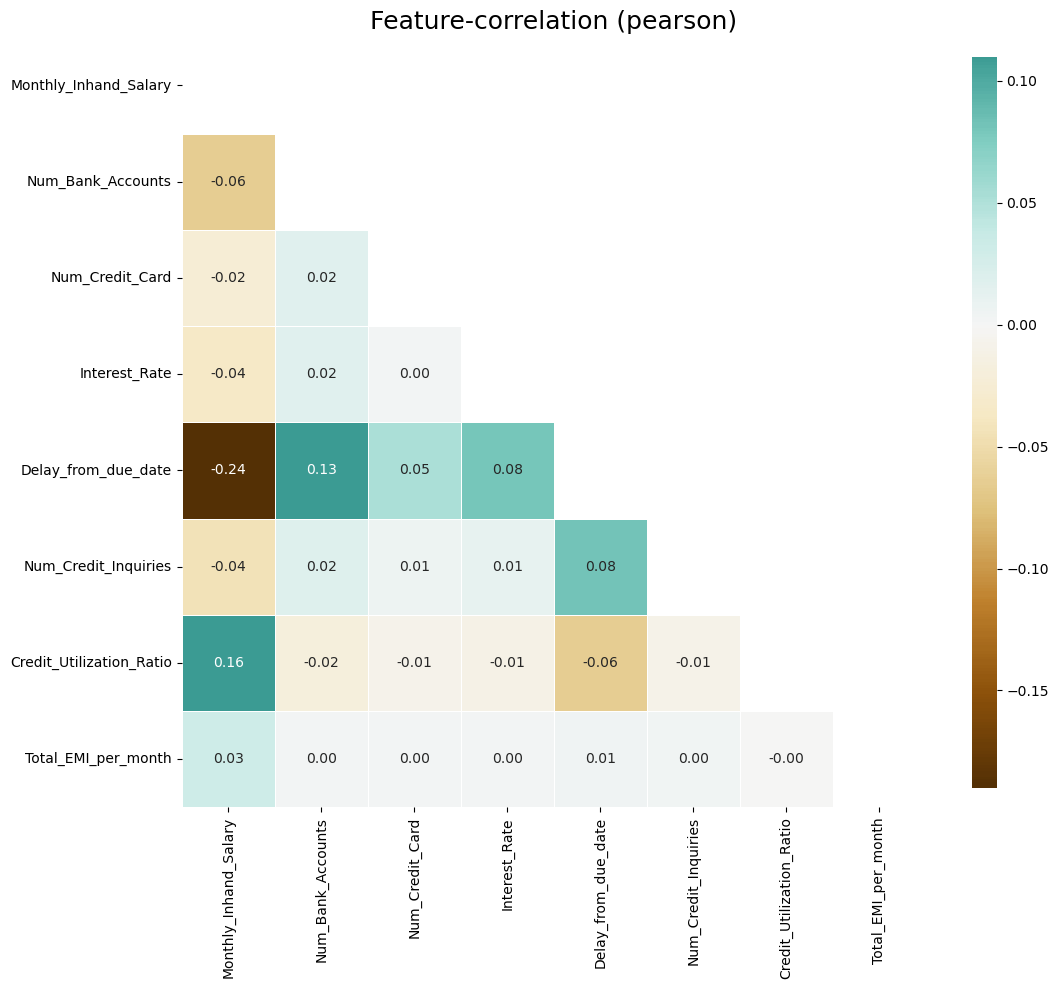

In [25]:
klib.corr_plot(dataset)

# correlation matrix

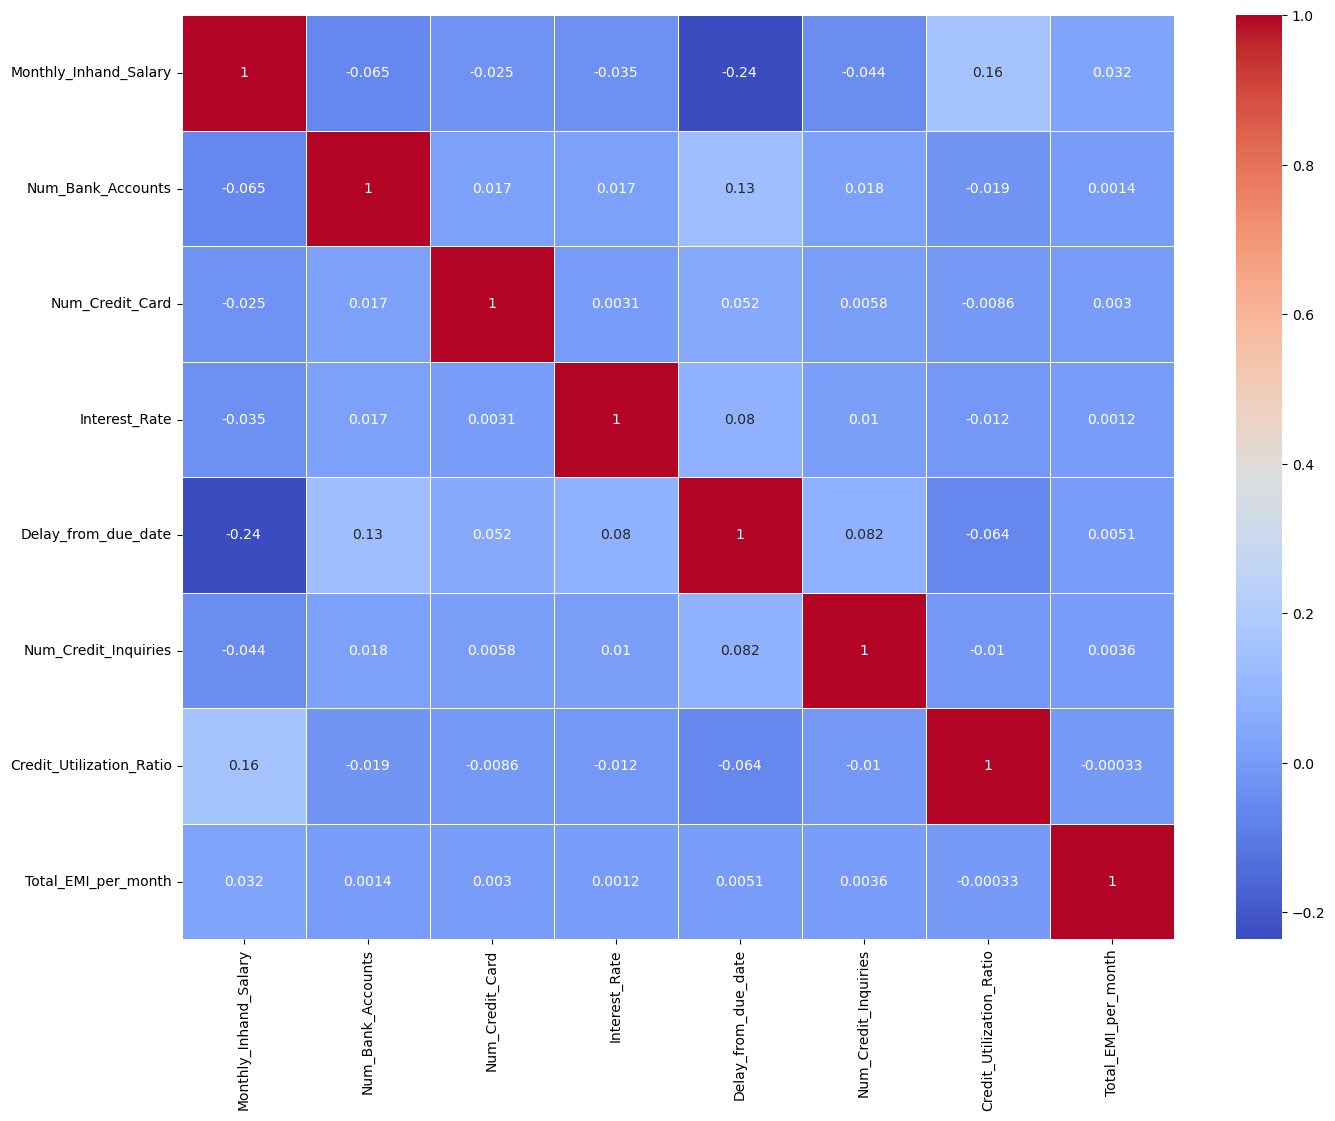

In [26]:
correlation_matrix = dataset.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(16,12))   #initializing an empty figure by specifying its height & width
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  #heatmap == matrice de correlation
plt.show()   #print function of visualizations

# Boxplots

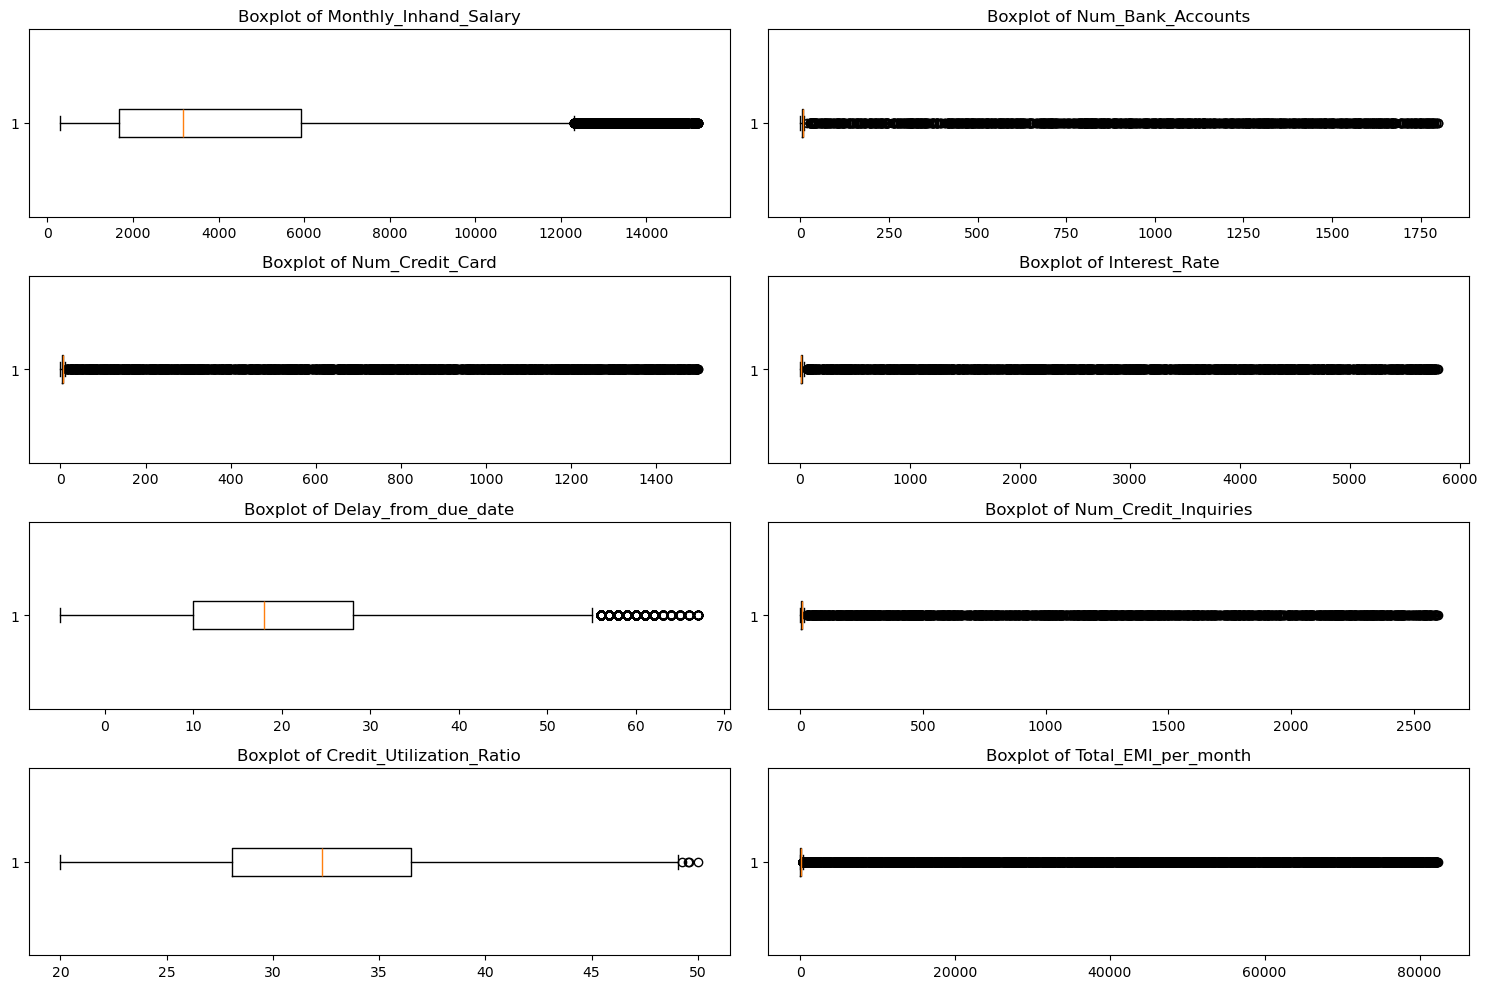

In [27]:
#Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Convert oject column to numerique :

## Menth to numerique :

In [28]:
# Create a mapping of month names to numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
# Apply the mapping to the 'Month' column
dataset['Month'] = dataset['Month'].map(month_mapping)

In [29]:
# Dictionnaire pour stocker les mappings
label_mappings = {}

# Liste des colonnes à exclure et à supprimer
excluded_columns = ['ID', 'Customer_ID', 'Name', 'SSN']

# Boucle à travers chaque colonne de type object du DataFrame
for column in dataset.select_dtypes(include=['object']).columns:
    
    # Initialiser un nouveau LabelEncoder pour chaque colonne
    label_encoder = LabelEncoder()
    # Appliquer le LabelEncoder à la colonne
    dataset[column] = label_encoder.fit_transform(dataset[column])
    # Vérifier si la colonne fait partie de la liste d'exclusion ou contient plus de 10 valeurs uniques
    
    if column not in excluded_columns and dataset[column].nunique() <= 10:

        # Sauvegarder le mapping dans le dictionnaire
        label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    else:
        print(f"Colonne '{column}' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).")

# Supprimer les colonnes exclues
dataset = dataset.drop(columns=excluded_columns, errors='ignore')

# Afficher les mappings enregistrés
print(label_mappings)

Colonne 'ID' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Customer_ID' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Name' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Age' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'SSN' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Occupation' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Annual_Income' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Num_of_Loan' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Type_of_Loan' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Num_of_Delayed_Payment' ignorée (soit dans la liste d'exclusion ou contient plus de 10 possibilités).
Colonne 'Changed_Cr

In [30]:
label_mappings

{'Credit_Mix': {'Bad': 0, 'Good': 1, 'Standard': 2, '_': 3},
 'Payment_of_Min_Amount': {'NM': 0, 'No': 1, 'Yes': 2},
 'Payment_Behaviour': {'!@9#%8': 0,
  'High_spent_Large_value_payments': 1,
  'High_spent_Medium_value_payments': 2,
  'High_spent_Small_value_payments': 3,
  'Low_spent_Large_value_payments': 4,
  'Low_spent_Medium_value_payments': 5,
  'Low_spent_Small_value_payments': 6},
 'Credit_Score': {'Good': 0, 'Poor': 1, 'Standard': 2}}

In [31]:
dataset.dtypes

Month                         int64
Age                           int32
Occupation                    int32
Annual_Income                 int32
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                   int32
Type_of_Loan                  int32
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit          int32
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt              int32
Credit_Utilization_Ratio    float64
Credit_History_Age            int32
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly       int32
Payment_Behaviour             int32
Monthly_Balance               int32
Credit_Score                  int32
dtype: object

# SMOTE (Synthetic Minority Over-sampling Technique) handling imbalanced datasets

In [32]:
dataset['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [33]:
X= dataset.drop(columns=["Credit_Score"])
Y= dataset["Credit_Score"]
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled_smote.shape}''')

print('\n Balance of positive and negative classes (%):')
fg = y_resampled_smote.value_counts(normalize=True) * 100
print(fg)

df_resampled = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
dataset = df_resampled

Shape of X before SMOTE: (100000, 23)
Shape of X after SMOTE: (159522, 23)

 Balance of positive and negative classes (%):
Credit_Score
0    33.333333
2    33.333333
1    33.333333
Name: proportion, dtype: float64


In [34]:
dataset['Credit_Score'].value_counts()

Credit_Score
0    53174
2    53174
1    53174
Name: count, dtype: int64

# Data splitting

In [35]:
# Splitting features and labels
X= dataset.iloc[: , :-1]
y= dataset.iloc[: , -1]

In [36]:
X.shape

(159522, 23)

In [37]:
y.shape

(159522,)

In [38]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print ('X_train = ',X_train.shape ,'X_test = ', X_test.shape , 'y_train = ', y_train.shape , 'y_test = ', y_test.shape)

X_train =  (127617, 23) X_test =  (31905, 23) y_train =  (127617,) y_test =  (31905,)


In [40]:
# Standardize the data (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the models Classifier and train this on the trening set

In [41]:
# Create the GradientBoostingClassifier model
gb = GradientBoostingClassifier(n_estimators= 50, random_state= 42)
# Train the GradientBoostingClassifier on the training set
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [42]:
# Allow to choose the best k number
scores = []
n_neighbors = 30
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy for k=", k, "is:", round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

Accuracy for k= 1 is: 0.78
Accuracy for k= 2 is: 0.72
Accuracy for k= 3 is: 0.74
Accuracy for k= 4 is: 0.72
Accuracy for k= 5 is: 0.72
Accuracy for k= 6 is: 0.72
Accuracy for k= 7 is: 0.72
Accuracy for k= 8 is: 0.71
Accuracy for k= 9 is: 0.71
Accuracy for k= 10 is: 0.71
Accuracy for k= 11 is: 0.71
Accuracy for k= 12 is: 0.7
Accuracy for k= 13 is: 0.71
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.7
Accuracy for k= 16 is: 0.7
Accuracy for k= 17 is: 0.7
Accuracy for k= 18 is: 0.7
Accuracy for k= 19 is: 0.7
Accuracy for k= 20 is: 0.69
Accuracy for k= 21 is: 0.69
Accuracy for k= 22 is: 0.69
Accuracy for k= 23 is: 0.69
Accuracy for k= 24 is: 0.69
Accuracy for k= 25 is: 0.69
Accuracy for k= 26 is: 0.69
Accuracy for k= 27 is: 0.69
Accuracy for k= 28 is: 0.69
Accuracy for k= 29 is: 0.69


In [43]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=8)
# Train the KNN on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
# Train SVM model with radial basis function kernel
svm = SVC(kernel="rbf")
# Train the KNN on the training set
svm.fit(X_train, y_train)

SVC()

In [45]:
# Create a Decision Tree classifier
clt = DecisionTreeClassifier()
# Train the classifier on the training set
clt.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Create a LogisticRegression classifier
classifier = LogisticRegression(C=10,   # C : représente la régularization (avoid overfitting) > 0
                                class_weight=None,   # Weights : poids (non pondéré)
                                dual=False,
                                fit_intercept=True)   # hyperparameter for y = ax + b (b is the intercept)
# Train the LogisticRegression on the training set
classifier.fit(X_train, y_train)

LogisticRegression(C=10)

In [47]:
# Create a RandomForestClassifier classifier
rf = RandomForestClassifier(n_estimators= 50, random_state= 42)
# Train the RandomForestClassifier on the training se
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [48]:
# Create a AdaBoostClassifier classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
# Train the AdaBoostClassifier on the training se
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [49]:
# Create a XGBClassifier classifier
bst = XGBClassifier(n_estimators=8, max_depth=2, learning_rate=1, objective='binary:logistic')
# Create a XGBClassifier classifier
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
# Create a CatBoostClassifier classifier model
clfss = CatBoostClassifier(  
    iterations=50,  
    random_seed=42,  
    learning_rate=0.5  
) 
# Create a CatBoostClassifier classifier  
clfss.fit(  
    X_train, y_train,  
    eval_set=(X_train, y_train),  
    verbose=False,  
    plot=True  # Note : Vous pouvez utiliser plot=True uniquement si vous avez Matplotlib installé  
)  

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [51]:
# Create a LGBMClassifier model 
classifier_lgb = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31)  
# Create a LGBMClassifier classifier 
classifier_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4612
[LightGBM] [Info] Number of data points in the train set: 127617, number of used features: 23
[LightGBM] [Info] Start training from score -1.100377
[LightGBM] [Info] Start training from score -1.097273
[LightGBM] [Info] Start training from score -1.098189


LGBMClassifier()

# predict this models

In [52]:
# Prédictions
y_GradientBoostingClassifier = gb.predict(X_test)
y_KNeighborsClassifier = knn.predict(X_test)
y_SVC = svm.predict(X_test)
y_DecisionTreeClassifier = clt.predict(X_test)
y_LogisticRegression = classifier.predict(X_test)
y_RandomForestClassifier = rf.predict(X_test)
y_AdaBoostClassifier = ada.predict(X_test)
y_XGBClassifier = bst.predict(X_test)
y_CatBoostClassifiers = clfss.predict(X_test)
y_LGBMClassifier = classifier_lgb.predict(X_test)

# Evaluate models

In [53]:
def calcul_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_per_class = []
    
    for i in range(len(cm)):
        # True negatives (TN) are the sum of all elements that are not in the current row and column
        tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
        # False positives (FP) are the sum of the current column, excluding the diagonal element
        fp = np.sum(cm[:, i]) - cm[i, i]
        # Specificity for the current class
        specificity = tn / (tn + fp)
        specificity_per_class.append(specificity)
    
    # Return the average specificity across all classes
    return np.mean(specificity_per_class)

In [54]:
# Calcul des scores d'évaluation  
models = ['GradientBoostingClassifier', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier', 'XGBClassifier', 'CatBoostClassifiers', 'LGBMClassifier']  

accuracy_scores = [  
    accuracy_score(y_test, y_GradientBoostingClassifier),  
    accuracy_score(y_test, y_KNeighborsClassifier),  
    accuracy_score(y_test, y_SVC),  
    accuracy_score(y_test, y_DecisionTreeClassifier),  
    accuracy_score(y_test, y_LogisticRegression),
    accuracy_score(y_test, y_RandomForestClassifier),
    accuracy_score(y_test, y_AdaBoostClassifier),
    accuracy_score(y_test, y_XGBClassifier),
    accuracy_score(y_test, y_CatBoostClassifiers),
    accuracy_score(y_test, y_LGBMClassifier)    
]

# Specify average='macro' or 'weighted' for multiclass classification
precision_scores = [  
    precision_score(y_test, y_GradientBoostingClassifier, average='macro'),  
    precision_score(y_test, y_KNeighborsClassifier, average='macro'),  
    precision_score(y_test, y_SVC, average='macro'),  
    precision_score(y_test, y_DecisionTreeClassifier, average='macro'),  
    precision_score(y_test, y_LogisticRegression, average='macro'),
    precision_score(y_test, y_RandomForestClassifier, average='macro'),
    precision_score(y_test, y_AdaBoostClassifier, average='macro'),
    precision_score(y_test, y_XGBClassifier, average='macro'),
    precision_score(y_test, y_CatBoostClassifiers, average='macro'),
    precision_score(y_test, y_LGBMClassifier, average='macro')    
]

recall_scores = [  
    recall_score(y_test, y_GradientBoostingClassifier, average='macro'),  
    recall_score(y_test, y_KNeighborsClassifier, average='macro'),  
    recall_score(y_test, y_SVC, average='macro'),  
    recall_score(y_test, y_DecisionTreeClassifier, average='macro'),  
    recall_score(y_test, y_LogisticRegression, average='macro'),
    recall_score(y_test, y_RandomForestClassifier, average='macro'),
    recall_score(y_test, y_AdaBoostClassifier, average='macro'),
    recall_score(y_test, y_XGBClassifier, average='macro'),
    recall_score(y_test, y_CatBoostClassifiers, average='macro'),
    recall_score(y_test, y_LGBMClassifier, average='macro')    
]

f1_scores = [  
    f1_score(y_test, y_GradientBoostingClassifier, average='macro'),  
    f1_score(y_test, y_KNeighborsClassifier, average='macro'),  
    f1_score(y_test, y_SVC, average='macro'),  
    f1_score(y_test, y_DecisionTreeClassifier, average='macro'),  
    f1_score(y_test, y_LogisticRegression, average='macro'),
    f1_score(y_test, y_RandomForestClassifier, average='macro'),
    f1_score(y_test, y_AdaBoostClassifier, average='macro'),
    f1_score(y_test, y_XGBClassifier, average='macro'),
    f1_score(y_test, y_CatBoostClassifiers, average='macro'),
    f1_score(y_test, y_LGBMClassifier, average='macro')    
]
specificity = [  
    calcul_specificity(y_test, y_GradientBoostingClassifier),  
    calcul_specificity(y_test, y_KNeighborsClassifier),  
    calcul_specificity(y_test, y_SVC),  
    calcul_specificity(y_test, y_DecisionTreeClassifier),  
    calcul_specificity(y_test, y_LogisticRegression),
    calcul_specificity(y_test, y_RandomForestClassifier),
    calcul_specificity(y_test, y_AdaBoostClassifier),
    calcul_specificity(y_test, y_XGBClassifier),
    calcul_specificity(y_test, y_CatBoostClassifiers),
    calcul_specificity(y_test, y_LGBMClassifier)    
]

# Création du tableau des résultats  
results = pd.DataFrame({  
    'Model': models,  
    'accuracy_SC': accuracy_scores,  
    'precision_SC' : precision_scores,  
    'recall_SC' : recall_scores,
    'f1_SC' : f1_scores,
    'specificity' : specificity
})

results.set_index('Model', inplace=True)

# Affichage des résultats  
print(results)


                            accuracy_SC  precision_SC  recall_SC     f1_SC  \
Model                                                                        
GradientBoostingClassifier     0.753393      0.753454   0.753054  0.750095   
KNeighborsClassifier           0.709701      0.722989   0.709113  0.692229   
SVC                            0.738192      0.739576   0.737797  0.732697   
DecisionTreeClassifier         0.760696      0.760623   0.760539  0.760578   
LogisticRegression             0.650149      0.647754   0.649664  0.645456   
RandomForestClassifier         0.842313      0.842363   0.842097  0.841005   
AdaBoostClassifier             0.718445      0.717981   0.718042  0.714893   
XGBClassifier                  0.732769      0.732348   0.732427  0.729144   
CatBoostClassifiers            0.777684      0.777261   0.777388  0.776253   
LGBMClassifier                 0.794108      0.794128   0.793831  0.793019   

                            specificity  
Model                

[[9328  302 1080]
 [1353 8004 1221]
 [1814 2098 6705]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80     10710
           1       0.77      0.76      0.76     10578
           2       0.74      0.63      0.68     10617

    accuracy                           0.75     31905
   macro avg       0.75      0.75      0.75     31905
weighted avg       0.75      0.75      0.75     31905



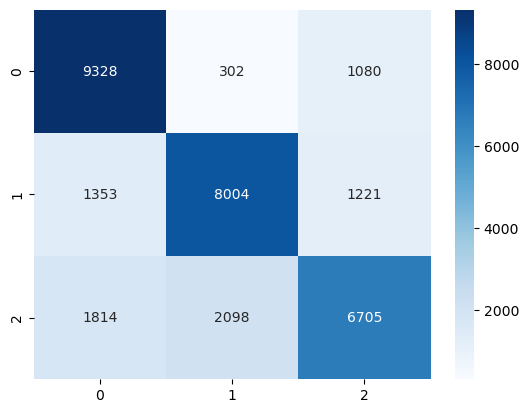

In [55]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_GradientBoostingClassifier))
print(classification_report(y_test, y_GradientBoostingClassifier))
sns.heatmap(confusion_matrix(y_test, y_GradientBoostingClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[10013   277   420]
 [ 1565  8110   903]
 [ 3149  2948  4520]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79     10710
           1       0.72      0.77      0.74     10578
           2       0.77      0.43      0.55     10617

    accuracy                           0.71     31905
   macro avg       0.72      0.71      0.69     31905
weighted avg       0.72      0.71      0.69     31905



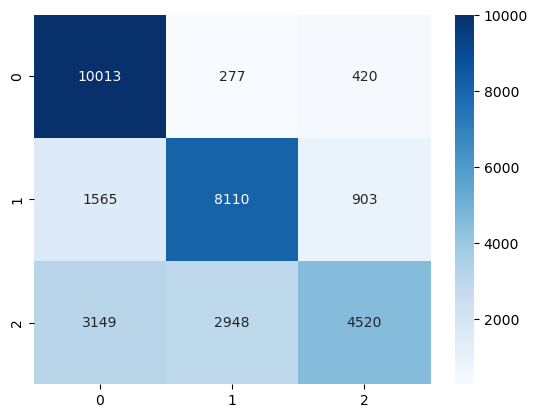

In [56]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_KNeighborsClassifier))
print(classification_report(y_test, y_KNeighborsClassifier))
sns.heatmap(confusion_matrix(y_test, y_KNeighborsClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9432  283  995]
 [1428 7997 1153]
 [2196 2298 6123]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     10710
           1       0.76      0.76      0.76     10578
           2       0.74      0.58      0.65     10617

    accuracy                           0.74     31905
   macro avg       0.74      0.74      0.73     31905
weighted avg       0.74      0.74      0.73     31905



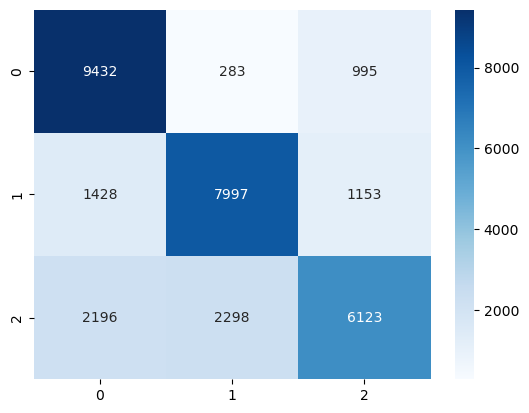

In [57]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_SVC))
print(classification_report(y_test, y_SVC))
sns.heatmap(confusion_matrix(y_test, y_SVC),annot=True,fmt='d',cmap='Blues')
plt.show()

[[8694  792 1224]
 [ 744 7981 1853]
 [1273 1749 7595]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     10710
           1       0.76      0.75      0.76     10578
           2       0.71      0.72      0.71     10617

    accuracy                           0.76     31905
   macro avg       0.76      0.76      0.76     31905
weighted avg       0.76      0.76      0.76     31905



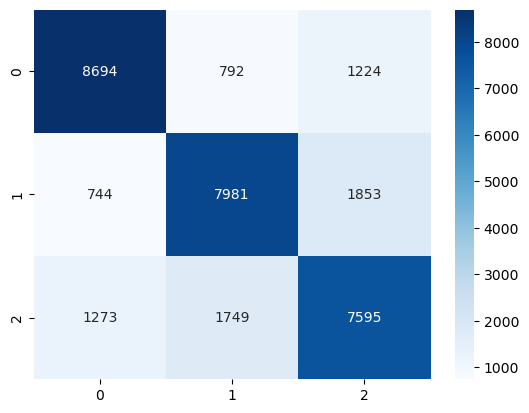

In [58]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_DecisionTreeClassifier))
print(classification_report(y_test, y_DecisionTreeClassifier))
sns.heatmap(confusion_matrix(y_test, y_DecisionTreeClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[8621  557 1532]
 [1568 6596 2414]
 [2694 2397 5526]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73     10710
           1       0.69      0.62      0.66     10578
           2       0.58      0.52      0.55     10617

    accuracy                           0.65     31905
   macro avg       0.65      0.65      0.65     31905
weighted avg       0.65      0.65      0.65     31905



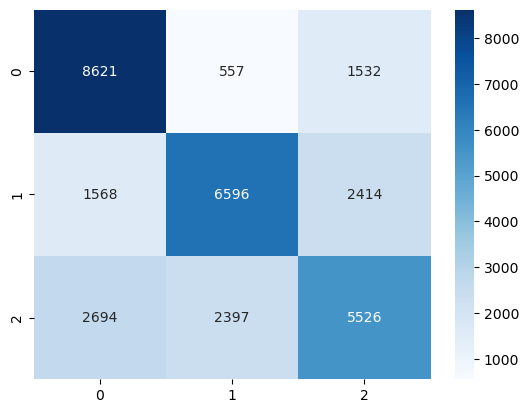

In [59]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_LogisticRegression))
print(classification_report(y_test, y_LogisticRegression))
sns.heatmap(confusion_matrix(y_test, y_LogisticRegression),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9833  173  704]
 [ 768 8956  854]
 [1131 1401 8085]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10710
           1       0.85      0.85      0.85     10578
           2       0.84      0.76      0.80     10617

    accuracy                           0.84     31905
   macro avg       0.84      0.84      0.84     31905
weighted avg       0.84      0.84      0.84     31905



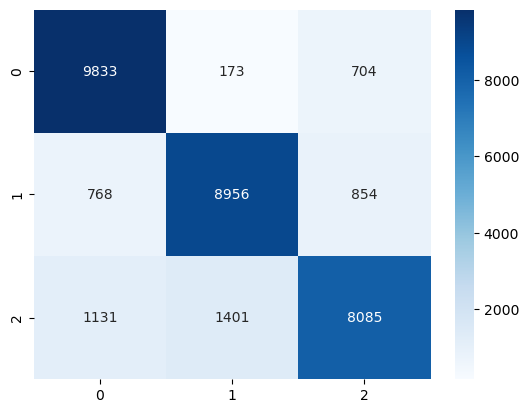

In [60]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_RandomForestClassifier))
print(classification_report(y_test, y_RandomForestClassifier))
sns.heatmap(confusion_matrix(y_test, y_RandomForestClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9093  540 1077]
 [1467 7405 1706]
 [2116 2077 6424]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78     10710
           1       0.74      0.70      0.72     10578
           2       0.70      0.61      0.65     10617

    accuracy                           0.72     31905
   macro avg       0.72      0.72      0.71     31905
weighted avg       0.72      0.72      0.72     31905



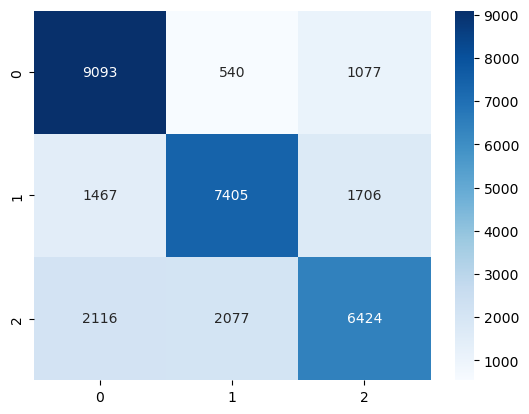

In [61]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_AdaBoostClassifier))
print(classification_report(y_test, y_AdaBoostClassifier))
sns.heatmap(confusion_matrix(y_test, y_AdaBoostClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9132  364 1214]
 [1457 7821 1300]
 [1937 2254 6426]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79     10710
           1       0.75      0.74      0.74     10578
           2       0.72      0.61      0.66     10617

    accuracy                           0.73     31905
   macro avg       0.73      0.73      0.73     31905
weighted avg       0.73      0.73      0.73     31905



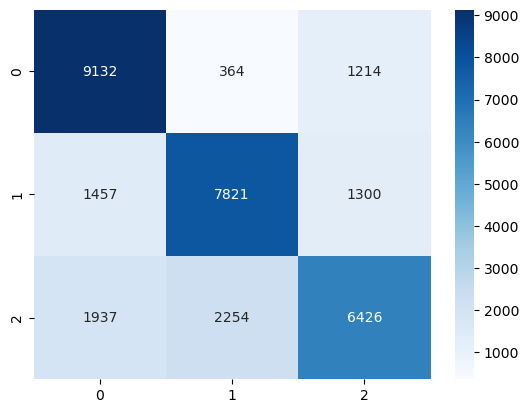

In [62]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_XGBClassifier))
print(classification_report(y_test, y_XGBClassifier))
sns.heatmap(confusion_matrix(y_test, y_XGBClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9308  313 1089]
 [1139 7975 1464]
 [1393 1695 7529]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     10710
           1       0.80      0.75      0.78     10578
           2       0.75      0.71      0.73     10617

    accuracy                           0.78     31905
   macro avg       0.78      0.78      0.78     31905
weighted avg       0.78      0.78      0.78     31905



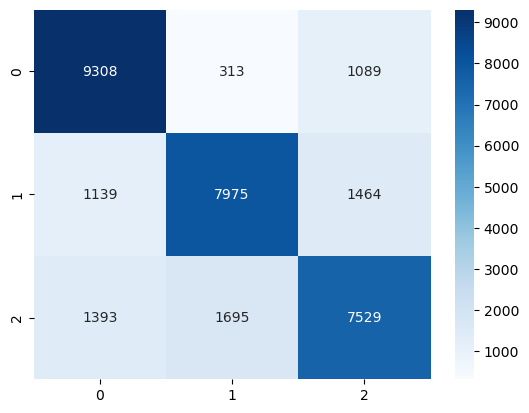

In [63]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_CatBoostClassifiers))
print(classification_report(y_test, y_CatBoostClassifiers))
sns.heatmap(confusion_matrix(y_test, y_CatBoostClassifiers),annot=True,fmt='d',cmap='Blues')
plt.show()

[[9406  254 1050]
 [1022 8132 1424]
 [1315 1504 7798]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10710
           1       0.82      0.77      0.79     10578
           2       0.76      0.73      0.75     10617

    accuracy                           0.79     31905
   macro avg       0.79      0.79      0.79     31905
weighted avg       0.79      0.79      0.79     31905



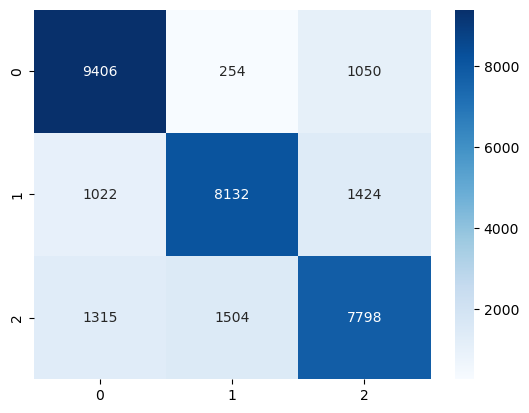

In [64]:
# Évaluation du modèle 
print(confusion_matrix(y_test, y_LGBMClassifier))
print(classification_report(y_test, y_LGBMClassifier))
sns.heatmap(confusion_matrix(y_test, y_LGBMClassifier),annot=True,fmt='d',cmap='Blues')
plt.show()

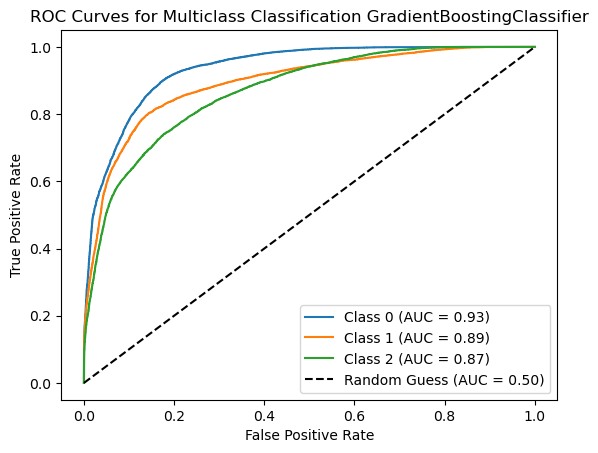

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = gb.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification GradientBoostingClassifier')

# Display the legend and plot
plt.legend()
plt.show()

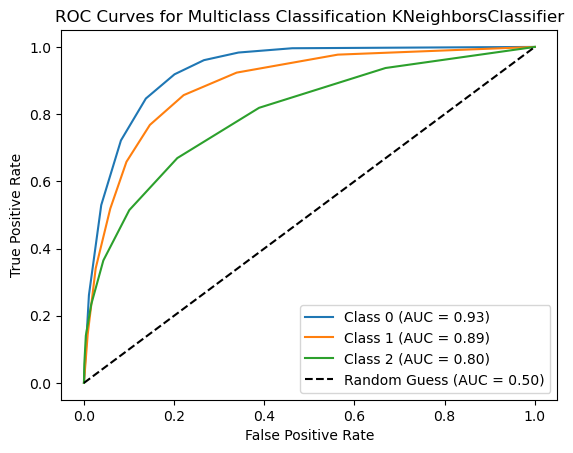

In [66]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = knn.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification KNeighborsClassifier')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Set up your SVC model with probability=True
svm = SVC(probability=True)

# Train your SVM model (assuming X_train, y_train are your training data)
svm.fit(X_train, y_train)

# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = svm.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification SVC')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = clt.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification DecisionTreeClassifier')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = classifier.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification LogisticRegression')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = rf.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification RandomForestClassifier')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = ada.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification AdaBoostClassifier')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = bst.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification XGBClassifier')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = clfss.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification CatBoostClassifiers')

# Display the legend and plot
plt.legend()
plt.show()

In [ ]:
# Binarize the output (needed for multiclass classification)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities for each class
y_probs = classifier_lgb.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

# Plot the random guess line (AUC = 0.50)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification LGBMClassifier')

# Display the legend and plot
plt.legend()
plt.show()